In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sounddevice as sd

In [3]:
test = np.random.randn(48000)*0.01
sd.play(test,48000)

In [7]:
sd.query_devices()

  0 Built-in Microphone, Core Audio (2 in, 0 out)
  1 Built-in Output, Core Audio (0 in, 2 out)
  2 STUDIO-CAPTURE EXP, Core Audio (18 in, 10 out)
  3 STUDIO-CAPTURE, Core Audio (18 in, 10 out)
* 4 機器セット, Core Audio (36 in, 20 out)

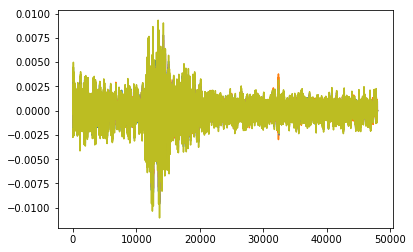

In [6]:
fs = 48000
duration = 1  # seconds
sd.query_devices()
sd.default.device = [4,4]
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=19,blocking=True)
plt.plot(myrecording)

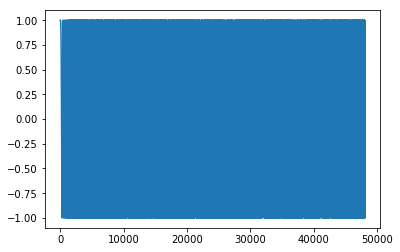

In [12]:
from scipy.signal import chirp

signal = chirp(np.arange(48000), 0.0, 96000, 1, method='linear', )
plt.plot(signal)
#signal = np.random.randn(48000)*0.1
signal = np.concatenate([signal,np.zeros(48000)])
p = sd.playrec(signal*0.5, samplerate=fs, input_mapping = [1,19,2,20],channels=4,blocking=True)

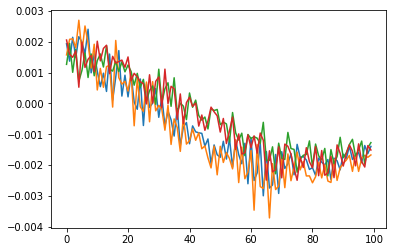

In [9]:
plt.plot(p[20000:20100,:])

In [80]:
np.corrcoef(p.T)

array([[ 1.        ,  0.23088696,  0.17280833,  0.11005715],
       [ 0.23088696,  1.        ,  0.16577492,  0.17278699],
       [ 0.17280833,  0.16577492,  1.        ,  0.11683432],
       [ 0.11005715,  0.17278699,  0.11683432,  1.        ]])

In [149]:
from scipy.signal import spectrogram
_,_,Sxx = spectrogram(p[:,0])

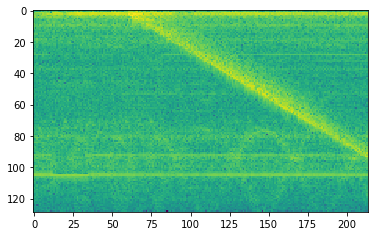

In [152]:
plt.imshow(np.log10(Sxx))